In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [22]:
file_path = r'F:\Udemy\Git\ML Portfolio\Streamlit Apps\Bangalore Housing Price App\Data\Bengaluru_House_Data.csv'

df = pd.read_csv(file_path)

In [60]:
df.head()

c:\Python311\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [5]:
df.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [6]:
df.corr(numeric_only=True)

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [31]:
def location():
    return df.groupby("location",observed=False)[['area_type']].count().sort_values('area_type',ascending=False).reset_index().iloc[0][0]
location()

C:\Users\soumy\AppData\Local\Temp\ipykernel_11500\3330702809.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.groupby("location",observed=False)[['area_type']].count().sort_values('area_type',ascending=False).reset_index().iloc[0][0]


'Whitefield'

In [45]:
def location_chart():
    return df.groupby("location",observed=False)[['area_type']].count().sort_values('area_type',ascending=False).reset_index().iloc[:,-1]
location_chart()

0       540
1       399
2       302
3       273
4       234
       ... 
1300      1
1301      1
1302      1
1303      1
1304      1
Name: area_type, Length: 1305, dtype: int64

In [55]:
df['total_sqft'] = np.where((df['total_sqft'].str.isdigit())|(df['total_sqft'].str.isdecimal()),df['total_sqft'],0)

In [65]:
df.describe()

,total_sqft,bath,balcony,price
count,13320.000000,13247.000000,12711.000000,13320.000000
mean,1514.883033,2.692610,1.584376,112.565627
std,1249.365286,1.341458,0.817263,148.971674
min,0.000000,1.000000,0.000000,8.000000
25%,1085.000000,2.000000,1.000000,50.000000
50%,1256.500000,2.000000,2.000000,72.000000
75%,1650.000000,3.000000,2.000000,120.000000
max,52288.000000,40.000000,3.000000,3600.000000


In [63]:
df['total_sqft'] = df['total_sqft'].astype('float64')

In [67]:
avg_sqft = df['total_sqft'].mean()

In [68]:
df['total_sqft'] = np.where(df['total_sqft']==0,avg_sqft,df['total_sqft'])

In [69]:
df['total_sqft'].mean()

np.float64(1552.8688388162939)

<Axes: >

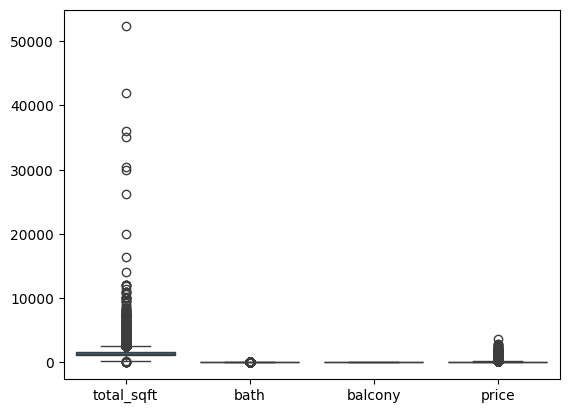

In [71]:
sns.boxplot(data=df)

In [80]:
df['price_per_sqft'] = df['price']/df['total_sqft']

In [84]:
df['price_per_sqft'].mean()*88

np.float64(7.001079265062655)

In [79]:
df['price'].mean()*88

np.float64(9905.775132132132)